# Machine Learning with Tensorflow (Keras)

This notebook shows the same systems as the ["P12" notebook](P12-MachineLearning.ipynb), but using Tensorflow/Keras


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
x = np.array([  # x is an Nx3 (x[0] is always 1, for the threshold, x[1], and x[2]
    [1,1,1],    # are the "real" inputs that correspond to actual data.
    [1,1,2],    # For example x[1] could be 
    [1,2,1],
    [1,2,2],
    [1,2,3],
    [1,3,2],
    [1,0.3,0.5],
    [1,2.5,2.5],
])

y = np.array([-1,-1,-1,1,1,1,-1,1])  # did they order fries? +1 -> yes, and -1 -> no.

In [3]:
#
# build a perceptron-like single layer
#

l0 = tf.keras.layers.Dense(units=1, input_shape=[3])  

In [4]:
#
# create a single sequence of this single layer
#

model = tf.keras.Sequential([l0])

In [5]:
#
# use a "mean square" loss/error function and a simple training optimizer
#

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [6]:
#
# train for 100 iterations
#

history = model.fit(x, y, epochs=100, verbose=False)
print("Finished training the model")

Finished training the model


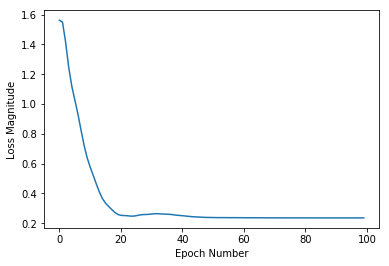

In [7]:
#
# plot the training history.
#

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [8]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[-1.0227706 ],
       [ 0.5743028 ],
       [ 0.61999834]], dtype=float32), array([-1.0530657], dtype=float32)]


In [9]:
model.predict(np.array([[1,1,1]]))

array([[-0.8815352]], dtype=float32)

In [10]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[3])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(x, y, epochs=100, verbose=False)
print("Finished training the model")
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
These are the l0 variables: [array([[-1.0469887 ,  0.76435727,  0.23746374,  0.26524276],
       [ 0.22685508, -0.52119756, -0.13128737, -0.50975186],
       [ 0.78510493, -0.390184  , -0.20229916,  0.76045686]],
      dtype=float32), array([-0.24095851,  0.21815498, -0.0909799 , -0.5572267 ], dtype=float32)]
These are the l1 variables: [array([[-0.85034305,  0.44672975,  0.60617346, -0.35163757],
       [ 0.27194247, -0.20217228,  0.7720422 ,  1.0519216 ],
       [-0.64001065, -0.3961401 ,  0.0343342 ,  0.6494044 ],
       [-0.18456244, -0.37008548,  0.3431412 , -0.01699765]],
      dtype=float32), array([ 0.38294852, -0.279862  ,  0.22918443,  0.33778292], dtype=float32)]
These are the l2 variables: [array([[-0.3475307 ],
       [ 0.1260038 ],
       [-0.22493674],
       [-0.5088532 ]], dtype=float32), array([-0.36077186], dtype=float32)]


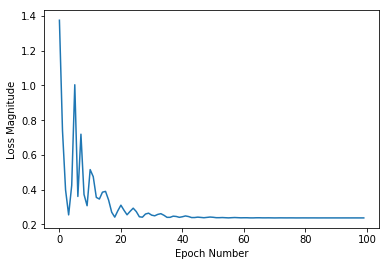

In [11]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [12]:
N=100
xx,yy = np.meshgrid(np.linspace(min(x[:,1])-1,max(x[:,1]+1),N),
                    np.linspace(min(x[:,2])-1,max(x[:,2]+1),N))

xs = []
for i in range(N):
    for j in range(N):
        xs.append([1,xx[i,j],yy[i,j]])

zs = model.predict(np.array(xs))
zz = zs.reshape(N,N)

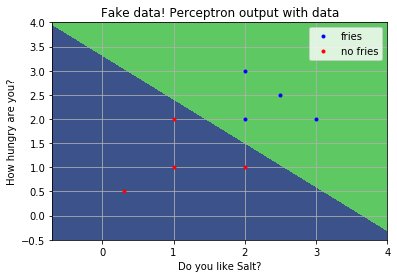

In [13]:
plt.contourf(xx,yy,zz,levels=[-10,0,+10])

ix_fries = (y==1)              # boolean, do you like fries?
ix_no_fries = np.invert(ix_fries) # boolean, inverse of ix_fries?

plt.title("Fake data! Perceptron output with data")
plt.xlabel("Do you like Salt?")
plt.ylabel("How hungry are you?")

plt.plot(x[ix_fries,1],x[ix_fries,2],'b.',label="fries")
plt.plot(x[ix_no_fries,1],x[ix_no_fries,2],'r.',label="no fries")
plt.legend()
plt.grid()

In [14]:
import pandas as pd
df = pd.read_csv('Iris.csv')  # load the Iris dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


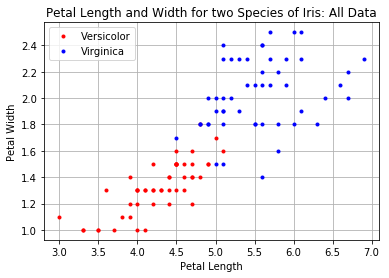

In [15]:
sub_frame = df[(df['Species']=='Iris-versicolor')|(df['Species']=='Iris-virginica')] # only two species
train_ix = np.random.rand(len(sub_frame))<0.8   # an array of random booleans, 80% true
train_df = sub_frame[train_ix]        # choose a random "training" set using the random index
test_df = sub_frame[np.invert(train_ix)] # use the rest for "testing".

#
# x is a 5xN (~80 samples with 4 traits + offset in column 1)
#
x=np.array([
    np.ones(len(train_df)),
    train_df.PetalLengthCm.values,
    train_df.PetalWidthCm.values,
    train_df.SepalLengthCm.values,
    train_df.SepalWidthCm.values,]).T  # transpose to get in the right shape

#
# y is an Nx1, +1 if species == versi and -1 otherwise
#

y=np.where(train_df.Species=='Iris-versicolor',1,-1)

#
# build testing set arrays, just like training set, but using the remaining indexes
#

xt=np.array([
    np.ones(len(test_df)),
    test_df.PetalLengthCm.values,
    test_df.PetalWidthCm.values,
    test_df.SepalLengthCm.values,
    test_df.SepalWidthCm.values,]).T

yt=np.where(test_df.Species=='Iris-versicolor',1,-1)

#
# Now plot all the data to visualize what we're seeing
#

versi_df=sub_frame[sub_frame.Species=='Iris-versicolor'] # get all the versi
virg_df=sub_frame[sub_frame.Species=='Iris-virginica']   # get all the virg

plt.plot(versi_df.PetalLengthCm.values, versi_df.PetalWidthCm.values, 'r.', label="Versicolor")
plt.plot(virg_df.PetalLengthCm.values, virg_df.PetalWidthCm.values, 'b.', label="Virginica")

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length and Width for two Species of Iris: All Data")
plt.legend(loc=2)
plt.grid()

In [16]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[5])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(x, y, epochs=125, verbose=False)
print("Finished training the model")
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
These are the l0 variables: [array([[ 1.0151736 ,  0.1709488 , -0.29896027, -0.36411107],
       [-0.75684273, -0.4209568 ,  0.3192529 ,  0.4141346 ],
       [-1.1730714 , -0.53457236,  0.21706475,  0.43762246],
       [ 0.3763089 ,  0.32660452, -0.70903206,  0.27661657],
       [-0.13550304,  0.97144634,  0.21529275, -0.49860883]],
      dtype=float32), array([ 0.3715445 ,  0.4901354 , -0.13046445,  0.07748184], dtype=float32)]
These are the l1 variables: [array([[ 0.10732354,  1.0579735 , -0.04082891, -0.6728099 ],
       [-0.05003666,  0.84978086, -0.12917598, -0.37492603],
       [-0.508055  , -0.50679696, -0.10548654, -0.0131705 ],
       [-0.13466817, -0.4842254 ,  0.26112223,  0.21193555]],
      dtype=float32), array([-0.26972875,  0.21577187, -0.22320873, -0.46724316], dtype=float32)]
These are the l2 variables: [array([[ 0.02382502],
       [ 0.45426527],
       [-0.08930013],
       [-0.18751872]], dtype=float32), array([0.3205025], dtype=float32)

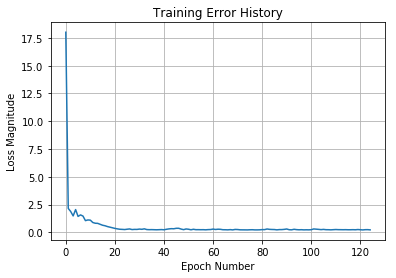

In [17]:
plt.title("Training Error History")
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.grid()

Prediction: 100.000000% Correct.


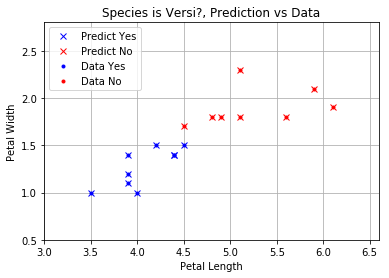

In [18]:
#
# build up an array of predictions
#

vals=[]
for i in range(len(xt)):
    vals.append((xt[i,1],xt[i,2],model.predict(np.array([xt[i]])),yt[i]))

z=np.array(vals,).T

#
# get outputs
#

gr=z[2]>=0.0
lt=np.invert(gr)

#
# plot outputs
#

plt.plot(z[0,gr],z[1,gr],'bx',label="Predict Yes") # show predictions of model with red and blue 'x's
plt.plot(z[0,lt],z[1,lt],'rx',label="Predict No")

#
# get original data
#

gr=z[3]>=0.0
lt=np.invert(gr)

#
# plot original data
#

plt.xlim(min(xt[:,1])-.5,max(xt[:,1])+.5)
plt.ylim(min(xt[:,2])-.5,max(xt[:,2])+.5)

#
# decorate with labels etc.
#

plt.plot(z[0,gr],z[1,gr],'b.',label="Data Yes") # show actual data with red and blue dots
plt.plot(z[0,lt],z[1,lt],'r.',label="Data No")
plt.legend(loc=2)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Species is Versi?, Prediction vs Data")
plt.grid()

#
# final success rate on test
#

print("Prediction: %f%% Correct." % (((z[2]>0)==(z[3]>0)).sum()*100/len(z[1])))